In [1]:
ReloadProject('deep_learning')

Path /workspace/external/ added to PYTHON_PATH.
Path /workspace/external/deep_learning added to PYTHON_PATH.


Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


notebook_init.py imported and reloaded
forwarded symbol: A
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: InputLayer
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: T
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: guided_environments
forwarded symbol: guided_environments
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: layers
forwarded symbol: layers
reloaded: logging
forwarded symbol: logging
reloaded: models
forwarded symbol: models
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: q_base
forwarded symbol: q_base
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: runner_impl
forwarded symbol: runner_impl


# My models

## 20-20-20
Try the model that has shape (20, 20, 20).

In [2]:
batch_size = 64  # used in qfunc and runner.
env = guided_environments.GuidedMountainCar(reward_factor=10.0)
qfunc = qfunc_impl.DQN(
    model=qfunc_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(20, 20, 20)),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

In [3]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=1.0)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[04:37:33] q_base.py:415 Episode 0/500: episode_total_reward = -180.65, episode_steps=199
[04:42:42] q_base.py:417 Episode 100/500: episode_total_reward = -190.35, episode_steps=199
[04:53:57] q_base.py:417 Episode 200/500: episode_total_reward = -193.19, episode_steps=199
[05:12:12] q_base.py:417 Episode 300/500: episode_total_reward = -190.34, episode_steps=199
[05:36:28] q_base.py:417 Episode 400/500: episode_total_reward = -188.83, episode_steps=199
CPU times: user 1h 26min 1s, sys: 59.9 s, total: 1h 27min 1s
Wall time: 1h 29min 25s


In [4]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.3)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[06:07:17] q_base.py:415 Episode 0/500: episode_total_reward = -172.12, episode_steps=199
[06:40:40] q_base.py:417 Episode 100/500: episode_total_reward = -182.97, episode_steps=199
[07:14:18] q_base.py:417 Episode 200/500: episode_total_reward = -177.54, episode_steps=199
[07:48:03] q_base.py:417 Episode 300/500: episode_total_reward = -192.84, episode_steps=199
[08:22:21] q_base.py:417 Episode 400/500: episode_total_reward = -180.09, episode_steps=199
CPU times: user 2h 46min 24s, sys: 45.7 s, total: 2h 47min 10s
Wall time: 2h 49min 8s


In [5]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[08:56:26] q_base.py:415 Episode 0/500: episode_total_reward = -192.65, episode_steps=199
[09:30:48] q_base.py:417 Episode 100/500: episode_total_reward = -177.91, episode_steps=199
[10:05:19] q_base.py:417 Episode 200/500: episode_total_reward = -177.90, episode_steps=199
[10:39:47] q_base.py:417 Episode 300/500: episode_total_reward = -180.17, episode_steps=199
[11:13:45] q_base.py:417 Episode 400/500: episode_total_reward = -193.21, episode_steps=199
CPU times: user 2h 49min 12s, sys: 45.1 s, total: 2h 49min 57s
Wall time: 2h 51min 21s


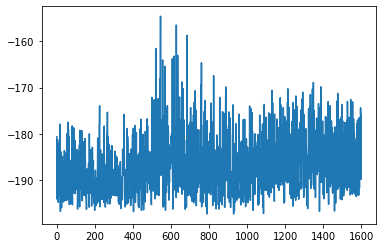

CPU times: user 33min, sys: 9.7 s, total: 33min 10s
Wall time: 33min 33s


In [6]:
%%time
# Test
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)